# Additional Visualizations

## General SOTA DP-Performance Graph
Display performance of non-adapted SOTA models under DP, compared to their performance without DP.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# perf data
dp_performances = np.array([0.42, 0.33, 0.61, 0.41, 0.49, 0.44, 0.59, 0.39])
nodp_performances = np.array([0.82, 0.78, 0.75, 0.70, 0.81, 0.83, 0.86, 0.87])

# grad data (GGN of best run)
dp_GGNs = np.array([12.0, 14.0, 23.0, 34.0, 9.0, 7.0, 24.0, 26.0])
nodp_GGNs = np.array([3.0, 5.0, 7.0, 6.0, 4.0, 2.0, 9.0, 4.0])

# model meta
model_names = np.array(["ResNet18_GN", "VGG11_GN", "DenseNet121_GN", "MobileNetV3_GN", 
                "GoogLeNet_GN", "Xception_GN", "DenseNet201_GN", "WideResNet50_GN"])
model_sizes = np.array([11.2, 128.0, 8.0, 4.2, 5.6, 20.8, 18.1, 18.1])

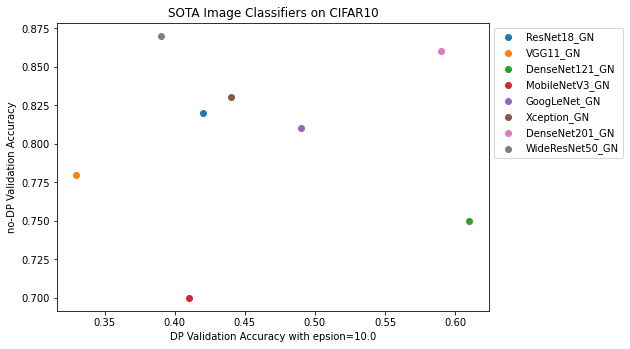

In [9]:
# Plot Nr. 1 - Scatter Plot DP/no-DP SOTA performances
fig = plt.figure()
axis = fig.add_axes([0, 0, 1, 1])

for i in range(len(dp_performances)): 
    axis.scatter(dp_performances[i], nodp_performances[i], label=model_names[i])

axis.legend(bbox_to_anchor=(1,1),loc="upper left")
axis.set_xlabel("DP Validation Accuracy with epsion=10.0")
axis.set_ylabel("no-DP Validation Accuracy")
axis.set_title("SOTA Image Classifiers on CIFAR10")
plt.show()
#plt.scatter(dp_performances, nodp_performances, c='g')

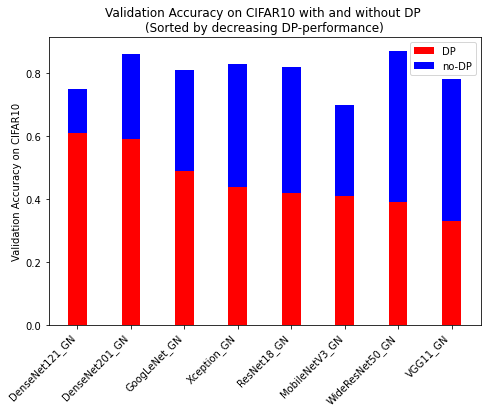

In [15]:
# Plot Nr. 2 - Bar Plot DP/no-DP SOTA performances

# order based on decreasing DP performance
# on negative dp_performances bs argsort works only increasing order
# negating array inverts this order (highest is lowest)
dec_dp_perf_indices = (-dp_performances).argsort()

# apply order
new_nodp_perfomances = nodp_performances[dec_dp_perf_indices]
new_dp_performances = dp_performances[dec_dp_perf_indices]
new_model_names = model_names[dec_dp_perf_indices]

# calculate difference for plot
diff_nodp_dp = new_nodp_perfomances-new_dp_performances

width = 0.35
fig = plt.figure()
axis = fig.add_axes([0,0,1,1])
axis.bar(new_model_names, new_dp_performances, width, color='r')
axis.bar(new_model_names, diff_nodp_dp, width, bottom=new_dp_performances, color='b')
axis.set_ylabel('Validation Accuracy on CIFAR10')
axis.set_title('Validation Accuracy on CIFAR10 with and without DP \n(Sorted by decreasing DP-performance)')

plt.xticks(rotation=45, ha="right")
axis.legend(labels=['DP', 'no-DP'])
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

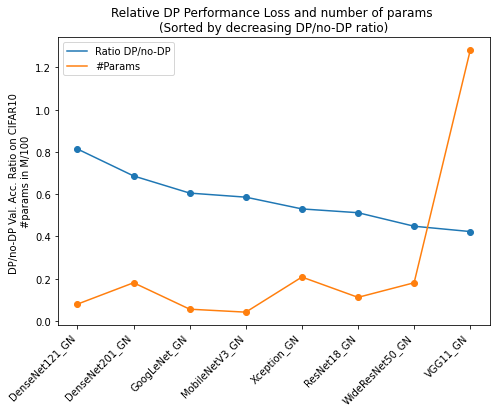

In [12]:
# Plot Nr. 3 

# TODO: we could also think about plotting the relation to the #params for each 
# architecture type separately (e.g. ResNet18, ResNet50, ResNet152, etc.)

ratio_dp_nodp = dp_performances/nodp_performances
dec_dp_ratio_indices = (-ratio_dp_nodp).argsort()

# apply order
ratio_dp_nodp = ratio_dp_nodp[dec_dp_ratio_indices]
new_model_names = model_names[dec_dp_ratio_indices]
new_model_sizes = model_sizes[dec_dp_ratio_indices]

width = 0.35
fig = plt.figure()
axis = fig.add_axes([0,0,1,1])

axis.scatter(new_model_names, ratio_dp_nodp)
axis.plot(new_model_names, ratio_dp_nodp, label="Ratio DP/no-DP")

axis.scatter(new_model_names, new_model_sizes/100)
axis.plot(new_model_names, new_model_sizes/100, label="#Params")

axis.set_ylabel('DP/no-DP Val. Acc. Ratio on CIFAR10 \n#params in M/100')
axis.set_title('Relative DP Performance Loss and number of params \n(Sorted by decreasing DP/no-DP ratio)')

plt.legend()
plt.xticks(rotation=45, ha="right")

## Gradient Graphs
Could be used to reveil more information about the GGN with and without DP for different SOTA models.<br>
Easy variant compared to following section. 

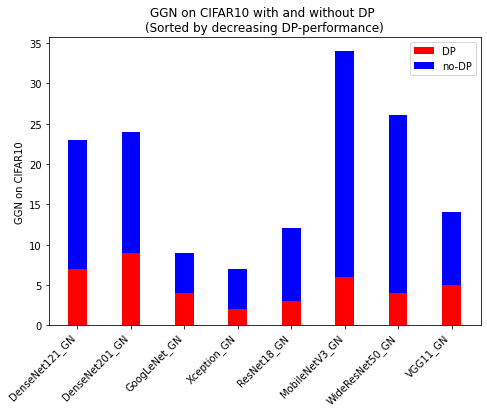

In [16]:
# TODO: think about normalizing with #params as absolute GGNs are larger for many params (higher dim)
# Figure 1 - GGN Value DP and non-DP as part of it

# order based on decreasing DP performance (to be able to compare better with above Plot Nr. 2)
dec_dp_perf_indices = (-dp_performances).argsort()
# OR by decreasing DP GGN
#dec_GGN_magnitude_indices = (-dp_GGNs).argsort()

# apply order
new_nodp_perfomances = nodp_performances[dec_dp_perf_indices]
new_dp_performances = dp_performances[dec_dp_perf_indices]
new_nodp_GGNs = nodp_GGNs[dec_dp_perf_indices]
new_dp_GGNs = dp_GGNs[dec_dp_perf_indices]
new_model_names = model_names[dec_dp_perf_indices]

# calculate difference for plot
diff_nodp_dp = new_nodp_perfomances-new_dp_performances
diff_dp_nodp_GGNs = new_dp_GGNs-new_nodp_GGNs

width = 0.35
fig = plt.figure()
axis = fig.add_axes([0,0,1,1])
axis.bar(new_model_names, new_nodp_GGNs, width, color='r')
axis.bar(new_model_names, diff_dp_nodp_GGNs, width, bottom=new_nodp_GGNs, color='b')
axis.set_ylabel('GGN on CIFAR10')
axis.set_title('GGN on CIFAR10 with and without DP \n(Sorted by decreasing DP-performance)')

plt.xticks(rotation=45, ha="right")
axis.legend(labels=['DP', 'no-DP'])
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

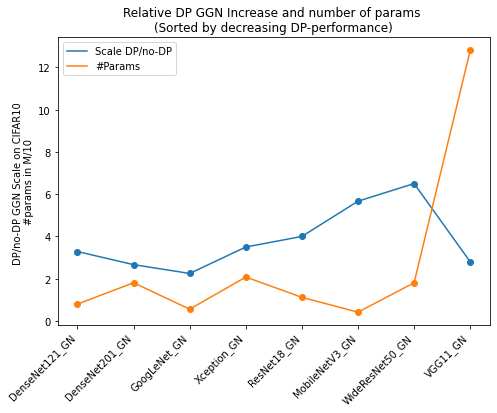

In [18]:
# Figure 2 - GGN DP/-no-DP Scale Factor and ordered by highest scale factor
# Plot Nr. 3 

# TODO: we could also think about plotting the relation to the #params for each 
# architecture type separately (e.g. ResNet18, ResNet50, ResNet152, etc.)

ratio_dp_nodp = dp_performances/nodp_performances
scale_dp_nodp_GGNs = dp_GGNs/nodp_GGNs

# dec_dp_ratio_indices = (-ratio_dp_nodp).argsort()
# dec_dp_scale_indices = (-scale_dp_nodp_GGNs).argsort()
# NOTE: currently sorted by decreasing DP-Performance

# apply order
new_scale_dp_nodp_GGNs = scale_dp_nodp_GGNs[dec_dp_perf_indices]
new_model_names = model_names[dec_dp_perf_indices]
new_model_sizes = model_sizes[dec_dp_perf_indices]

width = 0.35
fig = plt.figure()
axis = fig.add_axes([0,0,1,1])

axis.scatter(new_model_names, new_scale_dp_nodp_GGNs)
axis.plot(new_model_names, new_scale_dp_nodp_GGNs, label="Scale DP/no-DP")

axis.scatter(new_model_names, new_model_sizes/10)
axis.plot(new_model_names, new_model_sizes/10, label="#Params")

axis.set_ylabel('DP/no-DP GGN Scale on CIFAR10 \n#params in M/10')
axis.set_title('Relative DP GGN Increase and number of params \n(Sorted by decreasing DP-performance)')

plt.legend()
plt.xticks(rotation=45, ha="right")

## Advanced Smoothness Plots
Based on the visual, qualitative smoothness evaluation of the loss landscape in the NIPS paper "How Does Batch Normalization Help Optimization?" by Santurkar et al., NIPS 2018. 

In [ ]:
# Figure 1 - Loss Landscape


In [ ]:
# Figure 2 - Gradient Predictiveness


In [ ]:
# Figure 3 - Effective Beta-Smoothness